In [2]:
import re
import numpy as np
import matplotlib.pyplot as plot

In [3]:
def getProbDict(prb_dict):

    response = {}
    
    number = np.random.random(1)[0]
    data = list(filter(lambda key : prb_dict[key] > number, prb_dict))
    
    if len(data) > 0:
        for key in data:
            response[key] = prb_dict[key]
            
        response = list(dict(sorted(response.items(), key=lambda item: item[1])).keys())[0]
        return response
    else:
        return getProbDict(prb_dict)

In [4]:
def wordAndCharPrb(data):
    
    word_prb = {}
    char_prb = {}
    
    words = data.split()
    word_total = len(words)
    
    for word in words:
        length = len(word)
        
        if length in word_prb:
            word_prb[length] += 1
        else:
            word_prb[length] = 1
        
    data = data.replace(' ', '')
    char_total = len(data)
    
    for c in data:
        if c in char_prb:
            char_prb[c] += 1
        else:
            char_prb[c] = 1

    for key in char_prb:
        char_prb[key] = char_prb[key] / char_total
    
    for key in word_prb:
        word_prb[key] = word_prb[key] / word_total

    return [word_prb, char_prb]

In [5]:
def sortDict(d_dict):
    return dict(sorted(d_dict.items()))

In [6]:
file = open('Text_sample.txt')
text = file.read().replace('\n', '')

p = re.compile('[^a-z0-9\s]+')

o_data = re.sub(p, '', text.lower())
o_w_prb, o_c_prb = wordAndCharPrb(o_data)
new_words = []

for i in range(0, 5000):
    
    word_len = getProbDict(o_w_prb)
    
    word = ''
    for l in range(0, word_len):
        word = word + getProbDict(o_c_prb)
        
    new_words.append(word)
    
n_data = ' '.join(new_words)
n_w_prb, n_c_prb = wordAndCharPrb(n_data)

n_file = open("new_text.txt", "w")
n_file.write(n_data)
n_file.close()

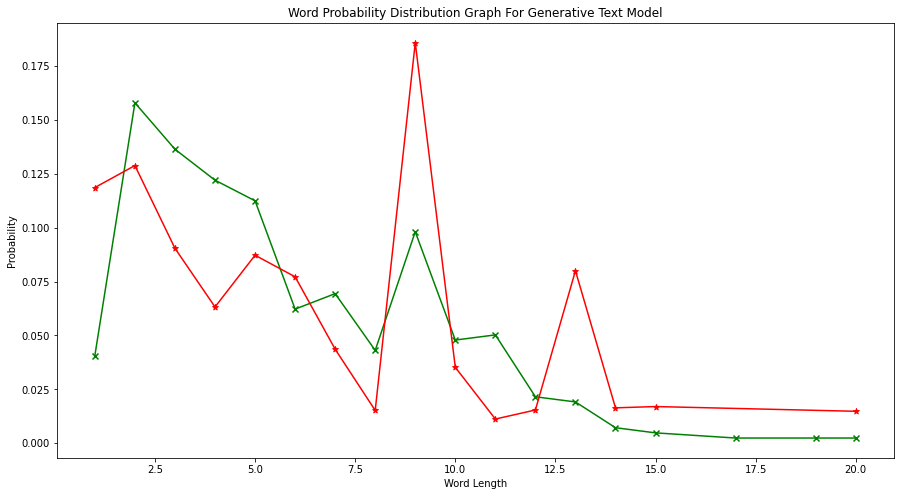

In [7]:
o_w_prb = sortDict(o_w_prb)
o_x = list(o_w_prb.keys())
o_y = list(o_w_prb.values())

n_w_prb = sortDict(n_w_prb)
n_x = list(n_w_prb.keys())
n_y = list(n_w_prb.values())

plot.figure(figsize = (15, 8))

plot.plot(o_x, o_y, color='green')
plot.scatter(o_x, o_y, color='green', marker='x')

plot.plot(n_x, n_y, color='red')
plot.scatter(n_x, n_y, color='red', marker='*')

plot.xlabel('Word Length')
plot.ylabel('Probability')
plot.title('Word Probability Distribution Graph For Generative Text Model')

plot.savefig('graph.png', bbox_inches='tight')
plot.show()